# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Исследование объявлений о продаже квартир в СПб

**Описание:** проект содержит данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

**Моя задача:** выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Цели моего исследования:** 
1. Определить рыночную стоимость квартир.
2. Построить автоматизированную систему по отслеживанию аномалий и ошибок
3. Определить факторы, влияющие на ценообразование стоимости квартир.

**Источник данных:**
Это реальная выгрузка из базы Яндекс.Недвижимости за 2014-2019 годы, данные получу из файла '/datasets/real_estate_data.csv'
О каждой квартире в базе содержится два типа данных: добавленные пользователем (площадь квартиры, этаж, высота потолков и пр.) и картографические (расстояние до центра, аэропорта, парка и пр.).
Качество данных предстоит проверить.

**Свою работу над данными я выполню в несколько этапов:**
1. Знакомство с данными.
2. Предобработка данных (устранение ошибок, пустующих ячеек, коректировка типов данных, удаление дубликатов).
3. Расчеты и добавление результатов в таблицу (день недели, месяц, год публикации объявления, тип этажа, расстояние до центра в км).
4. Проведение исследовательского анализа данных (изучение параметров: площадь, цена, количество комнат, балконы, потолки, этаж, расстояние до объектов инфраструктуры; расчет: среднего и медианы; определение: быстрых и долгих продаж, влияния параметров на цену, взаимозависимостей данных).
5. Визуализация данных (с помощью гистограмм и других графиков).
6. Общий вывод, фиксация результата исследования.
 

## Знакомство с данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

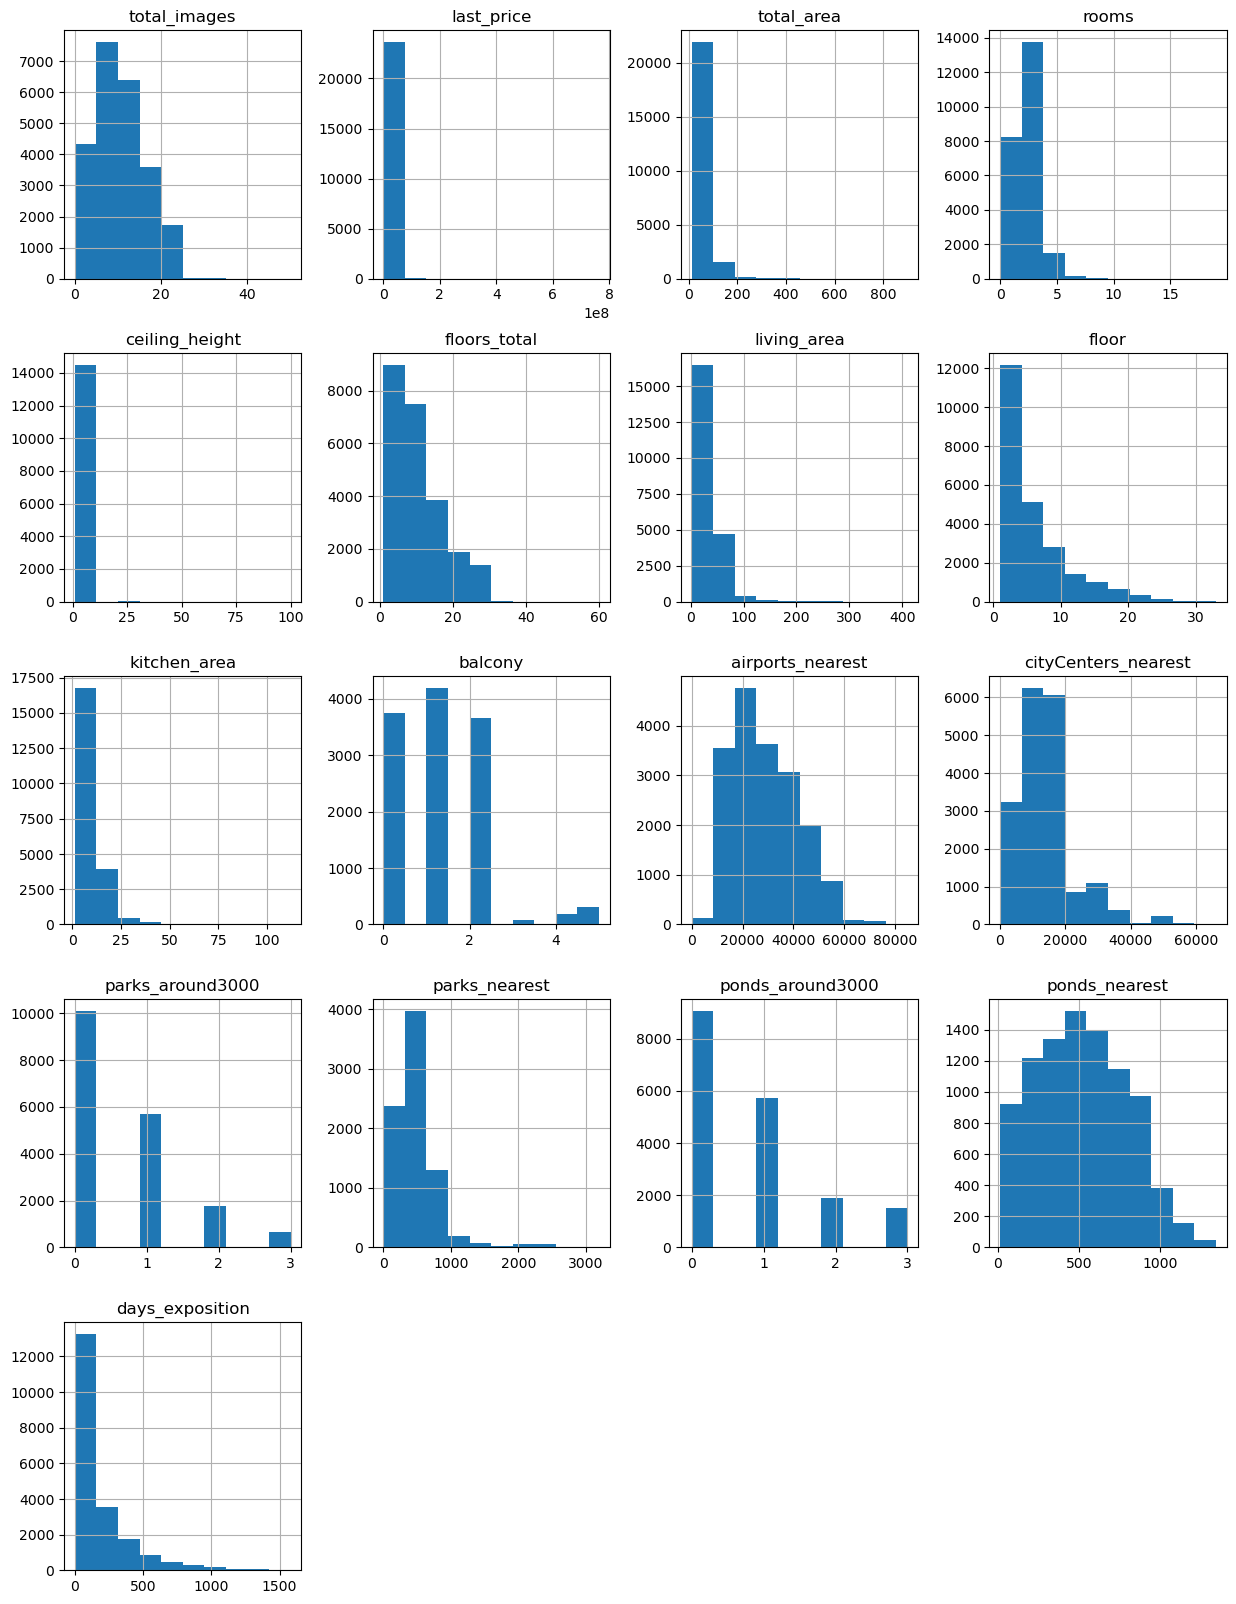

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
print(data.info())
data.hist(figsize=(15, 20))
plt.show()

## Предобработка данных
### Первый взгляд на данные
<br>
Посмотрим, где пропущены значения и сколько всего пропусков в столбцах.<br>
А также посчитаем общее количество строк в файле.

In [2]:
no_data = data.isna().sum().sort_values(ascending=False)
print(no_data)
print()
print('Всего строк в файле:', len(data))

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Всего строк в файле: 23699


### Предобработка столбца <i>is_apartment</i>:
<br> 
    В 14 строках отсутствуют значения. Чаще всего в столбце <i>is_apartment</i>, является ли помещение апартаментами. Возможно, не все знают отличие квартиры от апартаментов. Скорее всего, если ничего не указано, это не апартаменты. Т.к. у нас значения в столбце логические (True\False), предположим, что пропуск означает ответ <b>False</b> (не является апартаментами). Подставим его в столбец <i>is_apartment</i>.


In [3]:
data['is_apartment'] = data.is_apartment.fillna(False)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Предобработка столбцов <i>parks_nearest, ponds_nearest, airports_nearest, cityCenters_nearest</i>:</b>
<br>  
Следующие 2 строчки - <i>parks_nearest</i> и <i>ponds_nearest</i> - отображают расстояние до ближайшего парка и водоема в метрах. Человек может либо не знать, сколько метров до них, либо их в принципе нет поблизости. 

Мы можем предположить, что до этих объектов слишком далеко (к примеру, до них час ходьбы), и можем подставить некое максимальное значение, к примеру, 5000 метров. Итак, мы вставим в столбцы <i>parks_nearest</i> и <i>ponds_nearest</i> вместо пропущенных значений 5000 метров. И переведем в целочисленные значения для облегчения чтения данных.

Та же логика будет для столбцов <i>airports_nearest</i> и <i>cityCenters_nearest</i>. От центра до окраин примерно 10 км, т.е. 10 000 метров. И переведем в целочисленные значения для облегчения чтения данных.

<b>Предобработка столбцов <i>balcony, ponds_around3000, parks_around3000</i>:</b>
    
С <i>balcony</i> поступим иначе - раз человек не указал информацию, скорее всего, балконов нет. Заменим пустые строки на 0, а также приведем к целочисленному формату, поменяем с float на int.

Аналогично столбцу <i>balcony</i> обработаем <i>ponds_around3000</i> и <i>parks_around3000</i>. Они показывают число водоемов и парков в радиусе 3 км. 
Так как количество таких зон должно быть целочисленным, заменим тип данных с float на int.

In [34]:
data[['ponds_nearest', 'parks_nearest']] = data[['ponds_nearest', 'parks_nearest']].fillna(value=5000).astype('int')
data[['airports_nearest', 'cityCenters_nearest']] = data[['airports_nearest', 'cityCenters_nearest']].fillna(value=10000).astype('int')
data[['balcony', 'parks_around3000', 'ponds_around3000']] = data[['balcony', 'parks_around3000', 'ponds_around3000']].fillna(value=0).astype('int')

no_data = data.isna().sum().sort_values(ascending=False)
print(no_data.head(22))
print()
print(data.info())

days_exposition        2453
floors_total              9
total_images              0
airports_nearest          0
floor_type                0
publication_year          0
publication_month         0
publication_weekday       0
square_m_price            0
ponds_nearest             0
ponds_around3000          0
parks_nearest             0
parks_around3000          0
cityCenters_nearest       0
locality_name             0
last_price                0
balcony                   0
kitchen_area              0
open_plan                 0
studio                    0
is_apartment              0
floor                     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14496 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14496 non-null  int64         
 1   last_price            14496 non-null  int64         
 2   total_area            14

### Предобработка столбца <i>ceiling_height</i>:</b>
<br> 

В Санкт-Петербурге высота потолков в новостройках - от 2,5 до 3 метров. Новостройками можно считать дома, в которых 10 и более этажей. Старый фонд максимум до 7 этажей, советские жилые дома, "брежневки", были максимум 9 этажей. Поэтому можем сделать анализ имеющейся информации по этажам.
<ol>
    <li> <b>10 этаж и выше</b>:
Те квартиры, где пропущено значение ceiling_height, и где этаж от 10 и выше, можем считать квартирами в новостройках. Для них характерная высота потолков по СПб - от 2.5 до 3 метров. Среднее арифметическое двух значений 2.5 и 3 - 2.75 м.</li>
<br>
    <li> <b> 8-9 этаж</b>:
В городе много домов, построенных уже при советской власти (брежневки). Высота потолков в таких домах обычно 2.7 метров. Их строили высотой до 9 этажей. Мы не можем утверждать, что все квартиры на 8-9 этажах относятся именно к брежневкам, а не к новостройкам. Высота потолков 2.7 метров для брежневок вполне входит в диапазон высоты потолков для новостроек из п.1 - 2.5-3 метра. Так что для 8-9 этажей такое же среднее арифметическое, что и в п.1 - 2.75 м.</li>
<br>
    <li> <b> До 7 этажа</b>:
С средней высотой потолков в старом фонде дела обстоят иначе, их высота может достигать 4 метров (иногда даже больше).
Старый фонд (дореволюционный) обычно не выше 7 этажей*, но мы, конечно, не можем утверждать, не имея в наших данных года постройки, что каждая квартира в диапазоне 1-7 этаж - это старый фонд. Тем не менее, мы постараемся сделать более точный подсчет среднего арифметического высоты потолков - от 2.5 до 4 метров для 1-7 этажей. Получим 3.25 м.</li>

*Так как в 1844 году Николай I издал указ, запретивший строить гражданские здания свыше 11 саженей (около 23.5 м), это и есть 7 этажей.
</ol>
В столбце <i>ceiling_height</i> есть также несколько аномальных значений - 3 строки с высотой потолков от 1 до 1.75 метров, 4 строки с высотой 8-8.3 метра, 1 строка с высотой 10.3 метра, 1 строка с высотой 14 метров и 1 строка с высотой 100 метров и т.д. К аномалиям мы вернемся чуть ниже, а пока оставим их.

Проанализировав типичные высоты потолков и наличие аномальных значений в наших данных, попробуем взять <b>медиану</b> по столбцу и на основании результата определимся, какое значение будем подставлять в пустые клетки.


In [5]:
print(data['ceiling_height'].median())

2.65


<b>Предобработка столбца <i>ceiling_height</i>, комментарий:</b>
<br> 
У нас получилось 2.65 метра. Так как мы достоверно не знаем, какой тип здания у каждой квартиры, возьмем в качестве значения, подставляемого в пустые клетки, именно 2.65 метра для любого этажа (так как завышенные потолки, к примеру, 3,2 метра, могут искаженно влиять на цену, нам лучше взять меньшее из полученных значений в ходе нашего анализа).
 

### <b>Предобработка столбцов <i>days_exposition</i>, <i>first_day_exposition</i>:</b>
<br> 
Округлим значения в  стлбце <i>days_exposition </i>, так как значения вроде 90.00000000000001 усложняют чтение таблицы. <br>

Значения столбца <i>first_day_exposition</i> приведем к более читаемому формату дата-время.
<br>
Выведем на экран часть столбца <i>days_exposition </i> и убедимся, что все сработало.

In [6]:
data['days_exposition'] = data['days_exposition'].round()
data ['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817,18603,0,5000,0,5000,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0


 ### <b>Предобработка столбцов <i>floors_total, kitchen_area, living_area</i>:</b>
<br> 
У нас осталось еще несколько столбцов, где имеются пропуски: это <i>floors_total, kitchen_area, living_area</i> и <i>locality_name</i> (его мы рассмотрим отдельно).
<br>
Пропусков в столбце <i>floors_total</i> немного, всего 86 из 23699 строк (т.е. 0,36% от всех данных). Но удалять не будем. так в остальных столбцах данные строки "живые", полноценные.
<br>
С <i>kitchen_area</i> и <i>living_area</i> ситуация чуть сложнее. Доля пропусков в этих столбцах - 9,6% и 8% соответственно.
Нам необходимо заполнить эти пропуски.
    
Найдем медианную долю жилой площади (<i>living_area</i>) от общей площади квартиры (total_area).  
Также найдем медианную долю площади кухни (<i>kitchen_area</i>) от общей площади квартиры (total_area). 
<br>  
Получившуюся долю будем использовать для подстановки значений в пустых ячейках столбцов <i>living_area</i> и <i>kitchen_area</i>.   <br>  
Затем убедимся, что у нас не осталось пустых ячеек в этих столбцах.    


In [7]:
print('Медианная доля жилой площади в общей площади квартиры:', (round((data['living_area'] / data['total_area'])*100).median()),'%')
print('Медианная доля площади кухни в общей площади квартиры:', (round((data['kitchen_area'] / data['total_area'])*100).median()),'%')
print()

Медианная доля жилой площади в общей площади квартиры: 57.0 %
Медианная доля площади кухни в общей площади квартиры: 17.0 %



In [8]:
data['living_area'] = data['living_area'].fillna(data['total_area']*0.56).astype('float')
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*0.17).astype('float')

no_data = data.isna().sum().sort_values(ascending=False)
print(no_data.head(10))
data.head()

ceiling_height         9195
days_exposition        3181
floors_total             86
locality_name            49
kitchen_area              0
ponds_nearest             0
ponds_around3000          0
parks_nearest             0
parks_around3000          0
cityCenters_nearest       0
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2,посёлок Шушары,12817,18603,0,5000,0,5000,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.30,4,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,89.04,9,False,...,27.03,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0


### <b>Предобработка столбца <i>locality_name</i>:</b>
<br> 
    В <i>locality_name</i> выведем уникальные значения. Вместо NaN подставим "Санкт-Петербург".
Заменим ё на е, а также уберем лишние фразы из разряда "поселок", "село" и т.д. Не забудем и про лишние пробелы.

In [9]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [10]:
data['locality_name'] = data['locality_name'].astype(str).str.replace('ё', 'е', regex = True) \
    .str.replace('деревня ', '', regex = True) \
        .str.replace('поселок городского типа ', '', regex = True) \
            .str.replace('поселок ', '', regex = True) \
                .str.replace('городской ', '', regex = True) \
                    .str.replace('садовое товарищество ', '', regex = True) \
                        .str.replace('садоводческое некоммерческое товарищество ', '', regex = True) \
                            .str.replace('при железнодорожной станции ', '', regex = True) \
                                .str.replace('железнодорожная станция ', '', regex = True) \
                                    .str.replace('станции ', '', regex = True) \
                                        .str.replace('село ', '', regex = True) \
                                            .str.replace('коттеджный ', '', regex = True) \
                                                .str.replace('nan', 'Санкт-Петербург', regex = True)

print(data['locality_name'].unique())


['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодежное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалево' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

### <b>Аномальные значения в <i>ceiling_height</i>:</b>
<br> 
    В столбце <i>ceiling_height</i> есть несколько аномальных значений: <br>
    <ul>
    <li> 3 строки с высотой потолков от 1 до 1.75 метров,</li>
    <li> 4 строки с высотой 8-8.3 метра,</li>
    <li> 1 строка с высотой 10.3 метра,</li>
    <li> 1 строка с высотой 14 метров</li> 
    <li> 1 строка с высотой 100 метров</li>
    </ul>
   

In [11]:
print(data['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

<b>Работа со значениями:</b>
Выведем уникальные значения высот потолков. <br>
Из аномальных бросаются в глаза 14 значений, из которых часть можно поправить, т.к. очевидна ошибка с постановкой точки, а часть придется убрать.
<br> <br>
    <b>Поправим следующие значения: </b>
26.<br>
27.<br>
22.6<br>
32.<br>
24.<br>
27.5<br>
20.<br>
25.<br>

<br>
<b>Уберем:</b><br>
8.3<br>
8.<br>
1.<br>
100.<br>
14.<br>
10.3<br>
<br>
И проверим, что такие строки с значениями "уберем" удалились. Общее количество строк прежде было 23699.

In [12]:
data['ceiling_height'] = data['ceiling_height'].replace({26. : 2.6, 27. : 2.7, 22.6 : 2.26, 32. : 3.2, 24. : 2.4, 27.5 : 2.75, 20. : 2.0, 25. : 2.5})
data = data.query("1 < ceiling_height < 8")
print(data['ceiling_height'].unique())
print()
print(len(data))

[2.7  3.03 2.5  2.67 2.56 3.05 2.75 2.6  2.9  2.8  2.55 3.   2.65 3.2
 2.61 3.25 3.45 2.77 2.85 2.64 2.57 4.15 3.5  3.3  2.71 4.   2.47 2.73
 2.84 3.1  2.34 3.4  3.06 2.72 2.54 2.51 2.78 2.76 2.58 3.7  2.52 5.2
 2.87 2.66 2.59 2.   2.45 3.6  2.92 3.11 3.13 3.8  3.15 3.55 3.16 3.62
 3.12 2.53 2.74 2.96 2.46 5.3  5.   2.79 2.95 4.06 2.94 3.82 3.54 3.53
 2.83 4.7  2.4  3.38 3.01 5.6  3.65 3.9  3.18 3.35 2.3  3.57 2.48 2.62
 2.82 3.98 2.63 3.83 3.52 3.95 3.75 2.88 3.67 3.87 3.66 3.85 3.86 4.19
 3.24 4.8  4.5  4.2  3.36 3.08 3.68 3.07 3.37 3.09 3.26 3.34 2.81 3.44
 2.97 3.14 4.37 2.68 3.22 3.27 4.1  2.93 3.46 3.47 3.33 3.63 3.32 1.2
 2.98 2.86 3.17 4.4  3.28 3.04 4.45 5.5  3.84 3.23 3.02 3.21 3.43 3.78
 4.3  3.39 2.69 3.31 4.65 3.56 2.2  3.51 3.93 3.42 2.99 3.49 4.14 2.91
 3.88 1.75 4.25 3.29 2.25 3.76 3.69 6.   2.26 2.89 3.58 5.8  2.49 4.9
 3.48 3.59]

14496


 Еще раз взглянем на нашу таблицу. Все выглядит неплохо:

In [13]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,6.5,2,Санкт-Петербург,50898,15008,0,5000,0,5000,289.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,8.5,0,Санкт-Петербург,38357,13878,1,310,2,553,137.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,5.2,1,Петергоф,37868,33058,1,294,3,298,366.0


<b>Столбец <i>last_price</i></b><br>
Сменим float на int, ведь недвижимость с копейками не продают.

In [14]:
data['last_price'] = data['last_price'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,6.5,2,Санкт-Петербург,50898,15008,0,5000,0,5000,289.0
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,8.5,0,Санкт-Петербург,38357,13878,1,310,2,553,137.0
13,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,5.2,1,Петергоф,37868,33058,1,294,3,298,366.0


### Проверка на явные дубликаты

In [15]:
print('Полных совпадений строк:', data.duplicated().sum())
print()
print('Совпадений по дате и времени создания объявления:', data['first_day_exposition'].duplicated().sum())
print()
print(data['first_day_exposition'].value_counts())

Полных совпадений строк: 0

Совпадений по дате и времени создания объявления: 13097

2018-02-01    223
2018-03-26     84
2017-11-10     81
2017-10-13     71
2018-07-10     64
             ... 
2016-01-24      1
2015-08-02      1
2015-02-25      1
2016-10-28      1
2015-07-19      1
Name: first_day_exposition, Length: 1399, dtype: int64


<b>Комментарий к проверке на явные дубликаты:</b><br>
Мы проверили весь массив через сочетание duplicated() и sum() и видим, что полных совпадений строк нет. <br>
Если взглянуть на табличку, то можно заметить, что id у квартир нет, а поиск дубликатов по совпадению цены, метража или этажности - не совсем перспективная затея, так как они могут совпадать случайным образом.<br>
Наиболее достоверной проверкой было бы сравнить данные столбца "Дата и время создания объявления", но, проверив это, видим, что в данных нет точного времени (часы-минуты-секунды). Так что, к сожалению, и этот вариант дополнительной проверки отпадает.<br>
Впрочем, первого и основного, через duplicated(), вполне достаточно.

### Предобработка. Вывод.

<b> Итак, мы работаем  с базой, в которой: </b>
<ul>
<li> Достаточно много пропусков (14 столбов из 22 с пропущенными значениями, т.е. 63%).
<li> Больше всего пропусков в <i>is_apartment </i>(88% строк пусты), <i>parks_nearest </i>(66%) и <i>ponds_nearest </i>(61%).
<li> Мы заменили пропуски везде, где это было возможно. Для этого использовали медианы значения в таких столбах, как <i>ceiling_height, floors_total, kitchen_area, living_area</i>.
<li> В базе изначально были представлены разные типы данных: float, int, object, bool. Мы исправили типы в тех столбцы, где это было необходимо. Например, <i>first_day_exposition</i> был object, стал datetime. Столбцы <i>balcony, ponds_nearest, parks_nearest, last_price</i> и другие из float стали int.
<li> Явных дубликатов в базе не обнаружено.
<li> Неявные дубликаты: мы обработали столбец <i>locality_name</i>, сократив строки до более читабельных и убрав неявные дубликаты.
<li> Аномальные значения присутствовали в столбце <i>ceiling_height</i>, их мы тоже обработали (где возможно - поправили, в прочих случаях удалили).
</ul>    
<hr>

## Добавляем в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами:
    <ul>
<li> цена одного квадратного метра;
<li> день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
<li> месяц публикации объявления;
<li> год публикации объявления;
<li> тип этажа квартиры (значения — «первый», «последний», «другой»);
<li> расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
    </ul>

### Добавление столбца <i>square_m_price:</i> <br>
Посчитаем цену одного квадратного метра.
<br>

In [16]:
data['square_m_price'] = (data['last_price'] / data['total_area']).astype('int')
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,100000
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,2,Санкт-Петербург,50898,15008,0,5000,0,5000,289.0,88524
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,0,Санкт-Петербург,38357,13878,1,310,2,553,137.0,127525
13,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,1,Петергоф,37868,33058,1,294,3,298,366.0,82943


### Добавление столбцов <i> publication weekday, month, year</i>: 

Добавим также:<br>
<ul>
<li> <b>день недели</b> публикации объявления (0 — понедельник, 1 — вторник и так далее);
<li> <b>месяц</b> публикации объявления;
<li> <b>год </b>публикации объявления;
</ul>

In [17]:
#0 - пн, 1 - вт, 2 - ср, 3 - чт, 4 - пт, 5 - сб, 6 - вс.
data['publication_weekday'] = data['first_day_exposition'].dt.dayofweek

data['publication_month'] = data['first_day_exposition'].apply(lambda x: x.month)
data['publication_year'] = data['first_day_exposition'].apply(lambda x: x.year)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,publication_weekday,publication_month,publication_year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028,1,482,2,755,NaN,120370,3,3,2019
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098,2,112,1,48,121.0,100000,1,6,2018
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,15008,0,5000,0,5000,289.0,88524,6,2,2017
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,13878,1,310,2,553,137.0,127525,3,11,2017
13,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,33058,1,294,3,298,366.0,82943,5,7,2017


### Добавление столбца <i> floor_type:</i> 
Определим тип этажа квартиры со значениями «первый», «последний», «другой».

In [18]:
data['floor_type'] = np.where(data['floor'] == 1, 'первый', 'другой')
data['floor_type'] = np.where(data['floor'] == data['floors_total'], 'последний', data['floor_type'])
#Проверрим, что все получилось:
print(data['floor_type'].unique())


['другой' 'последний' 'первый']


### Добавление столбца <i>to_center_km</i>:
Посчитаем  расстояние до центра города в километрах.<br>
Переведем значения из м в км и округлим до целых.<br>


In [19]:
data['to_center_km'] = (data['cityCenters_nearest'] / 1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_m_price,publication_weekday,publication_month,publication_year,floor_type,to_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482,2,755,NaN,120370,3,3,2019,другой,16.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112,1,48,121.0,100000,1,6,2018,другой,8.0
9,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,5000,0,5000,289.0,88524,6,2,2017,другой,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,310,2,553,137.0,127525,3,11,2017,другой,14.0
13,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,294,3,298,366.0,82943,5,7,2017,последний,33.0


## Исследовательский анализ данных

### Изучим следующие параметры объектов:
<ul>
<li> общая площадь;
<li> жилая площадь;
<li> площадь кухни;
<li> цена объекта;
<li> количество комнат;
<li> высота потолков;
<li> этаж квартиры;
<li> тип этажа квартиры («первый», «последний», «другой»);
<li> общее количество этажей в доме;
<li> расстояние до центра города в метрах;
<li> расстояние до ближайшего аэропорта;
<li> расстояние до ближайшего парка;
<li> день и месяц публикации объявления.
    </ul>
Построим отдельные гистограммы для каждого из этих параметров.
<br>
    <i>Комментарий:</i> я могла бы собрать указанные столбцы в отдельный датафрейм и построить графики одной строчкой, но не буду этого делать, т.к. у столбцов разный диапазон значений, а тонкая настройка  параметра range в таком случае невозможна. Поэтому буду строить отдельно для каждого.
  

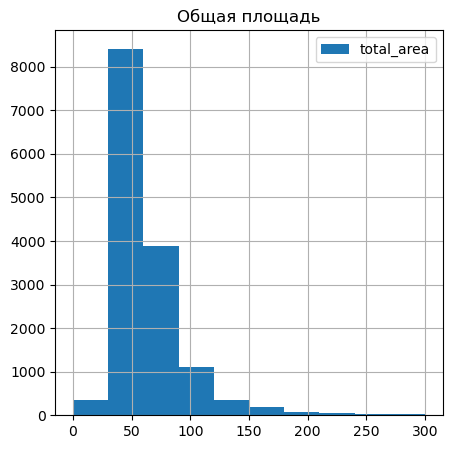

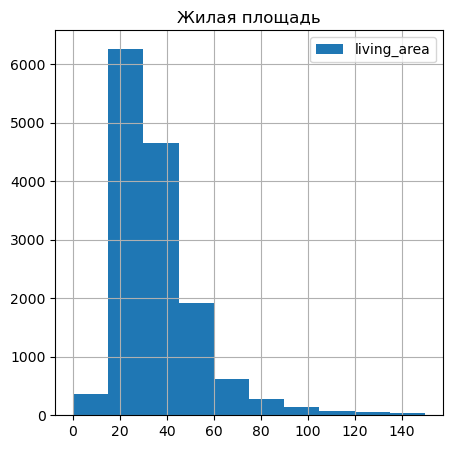

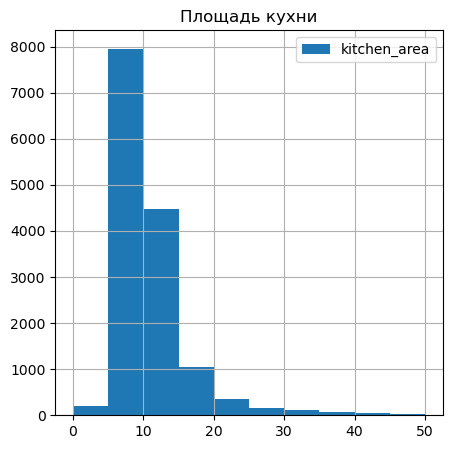

In [40]:
#Площади: общая, жилая, кухня
data.hist('total_area',range=(0,300), figsize=(5, 5), legend=True)
plt.title('Общая площадь')
plt.show()

data.hist('living_area', range=(0,150), figsize=(5, 5), legend=True)
plt.title('Жилая площадь')
plt.show()
data.hist('kitchen_area', range=(0,50), figsize=(5, 5), legend=True)
plt.title('Площадь кухни')
plt.show()

#### Площадь общая, жилая, кухня:
<ul>
    <li> Большинство (60%) выставленных на продажу квартир - общей площадью от 40 до 60 кв. метров.
    <li> Четверть (25%) - квартиры общей площадью от 60 до 90 кв. метров.
    <li> А вот квартир площадью около 100 кв метров, менее 1%.
    <li> Площадь жилых помещений чаще всего в районе 20-30 кв. метров, чуть реже - около 40 кв. метров.
    <li> Площадь кухни при этом примерно в 50% случаев - до 10 кв. метров, в 30% - от 10 до 15 кв. метров. 
    <li> Распределение на графиках общей, жилой площади и площади кухни в целом схоже. 
    <li> Можно сказать, что при общей площади около 50 кв. метров примерно 20-30 кв. будет занимать жилая часть и 5-10 - кухня.
</ul>

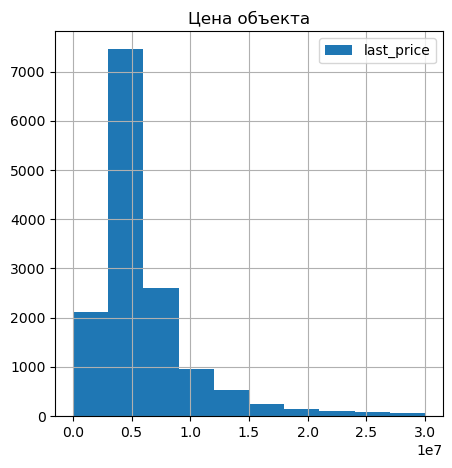

In [41]:
#Цена объекта:
data.hist('last_price', range=(0,30000000),  figsize=(5, 5), legend=True)
plt.title('Цена объекта')
plt.show()

#### Цена объекта:
<ul>
<li> Стоимость квартир в подавляющем большинстве до 15 млн рублей, причем чаще всего (55% объявлений) продают квартиры в ценовом диапазоне от 3 до 6 млн рублей (по ценам 2014-2019 гг.).
<li> Часть низкобюджетных предложений (до 3 млн руб) составляет примерно 16% от всех объявлений. Такую же долю занимают и предложения чуть выше рынка, от 6 до 9 млн рублей. 
<li> Квартиры от 9 и более млн рублей встречаются значительно реже (в сумме на них приходится 13% всех объявлений)
</ul>

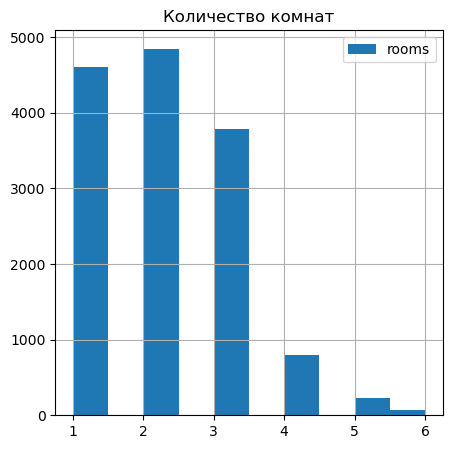

In [42]:
#Количество комнат:
data.hist('rooms', range=(1,6), figsize=(5, 5), legend=True)
plt.title('Количество комнат')
plt.show()

#### Количество комнат:
<ul>
<li> 1- и 2-х комнатных квартир продается примерно одинаковое количество - около 8000 объявлений , что составляет более трети (33.7%) всех объявлений в каждом случае.
<li> Примерно четверть квартир, выставленных на продажу, являются трехкомнатными.
<li> Примерно 7,5% приходится на 4,5 и 6-комнатные квартиры.
</ul>

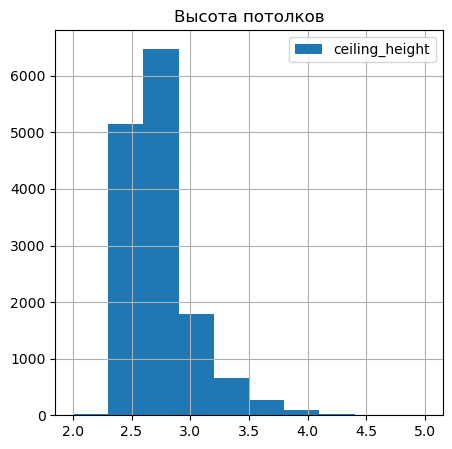

In [43]:
#Высота потолков:
data.hist('ceiling_height', range=(2,5), figsize=(5, 5), legend=True)
plt.title('Высота потолков')
plt.show()

#### Высота потолков:
<ul>
<li> Высота потолков в 66% объявлений - от 2,6 до 2,8 метра, что является стандартной высотой. При этом существенную долю (21%) занимают квартиры с низкими потолками (до 2,5 метров). 
<li> Квартир с высокими потолками гораздо меньше - 2,9 - 3,2 метра, к примеру, менее чем у 1% квартир.
</ul>

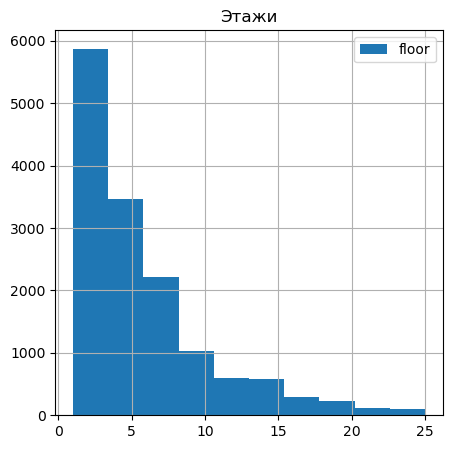

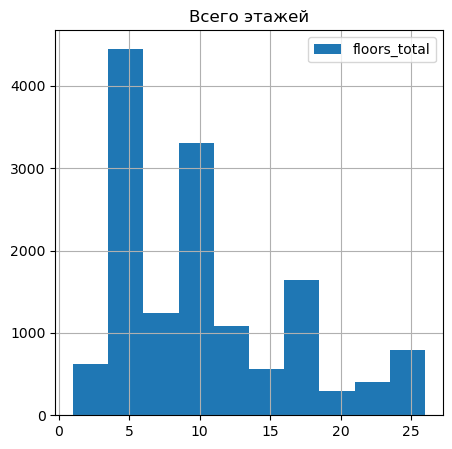

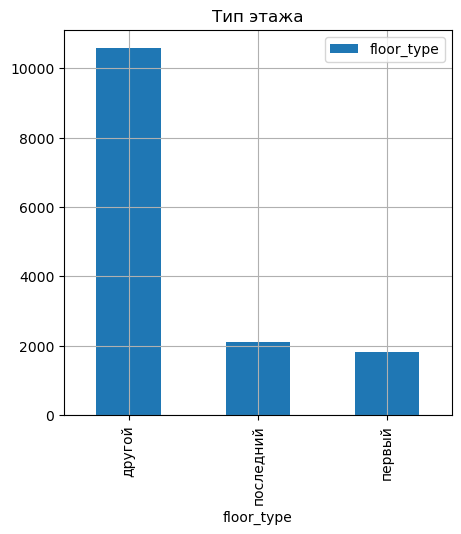

In [45]:
#Этаж, всего этажей, тип этажа:
data.hist('floor', range=(1,25), figsize=(5, 5), legend=True)
plt.title('Этажи')
plt.show()
data.hist('floors_total', range=(1,26), figsize=(5, 5), legend=True)
plt.title('Всего этажей')
plt.show()
data.groupby('floor_type')['floor_type'].count().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(5, 5), legend=True)
plt.title('Тип этажа')
plt.show()

#### Этаж, всего этажей, тип этажа:
<b>Этаж:</b> <ul>
<li> В основном продаются квартиры на 1-3 этажах (37% всех объявлений). 
<li> На 4-5 этажи приходится 24% всех объявлений. 
<li> На 6-8 этажи - 16% всех объявлений.
<li> На 9-10 - 7%.
<li>  Остальные 16 на квартиры от 11 этажа и выше.
<li>  В целом распределение достаточно равномерное, ступенчатое, за исключением явно выделяющейся на графике «ступеньки» первых трех этажей.
</ul>

<b>Всего этажей:</b> 
<ul>
<li> Среди общего количества этажей в домах демонстрируют преимущество квартиры в 4-7 этажных домах (33%). 
<li> В домах от 7 до 10 этажей находится 20% всех квартир в выборке. 
<li> Низкие дома (от 1 до 4 этажей) составляют всего 4%. 
<li> Все остальные квартиры (43%) более-менее равномерно распределены по домам с этажностью от 10.
</ul>

<b>Тип этажа:</b> <ul> 
<li> <b>Первых</b> и <b>последних</b> этажей согласно гистограмме примерно поровну - по 2000 объявлений, что составляет менее 1% всех объявлений в каждом случае.
<li> Остальные 98% приходятся на <b>«другие»</b> этажи.    
</ul>  

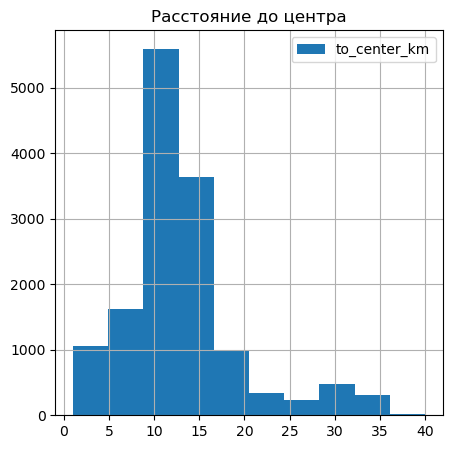

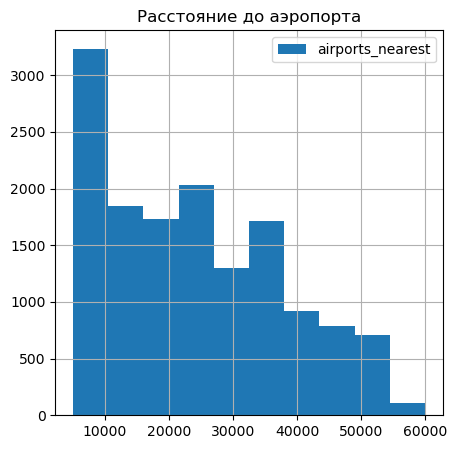

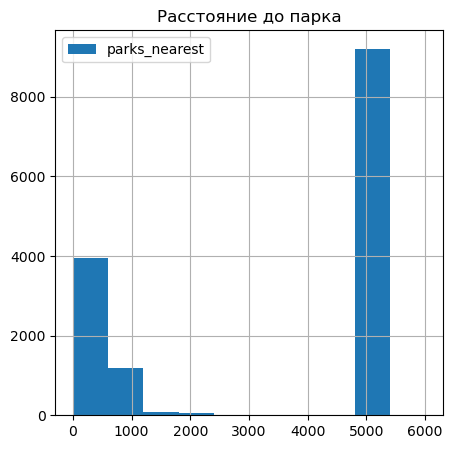

In [48]:
#Расстояние до центра, аэропорта, парка:
data.hist('to_center_km', range=(1,40), figsize=(5, 5), legend=True)
plt.title('Расстояние до центра')
plt.show()
data.hist('airports_nearest', range=(5000,60000), figsize=(5, 5), legend=True)
plt.title('Расстояние до аэропорта')
plt.show()
data.hist('parks_nearest', range=(0,6000), figsize=(5, 5), legend=True)
plt.title('Расстояние до парка')
plt.show()

#### Расстояние до центра, аэропорта, парка:
<b>Центр:</b><ul>
<li> Совсем близко к центру (до 5 км) расположено 7% квартир.
<li> Близко к центру (от 5 до 10 км) - расположено 9% квартир.
<li> 36% квартир расположены в 10-13 км от центра. Это преобладающее расстояние.
<li> 24% квартиры - 13-16 км от центра.
<li> 7% квартир - от 16 до 20 км от центра.
<li> Все остальные квартиры (17%) расположены дальше 20 км от центра.
</ul>

<b>Аэропорт:</b><ul>
<li> Ближе 5 км к аэропорту никто из нашей выборки не живет.
<li> Четверть всех квартир (25%) находится в 5-10 км от аэропорта.
<li> Многие квартиры продаются в 10-26 км от аэропорта.
<li> В целом распределение достаточно равномерное, ступенчатое, за исключением явно выделяющейся на графике «ступеньки» 5-10 км.
</ul>

<b>Парки:</b><ul>
<li> Парки по расстоянию доступнее, чем центр и аэропорт.
<li> Обрывочный график напоминает о том, что данных довольно мало. Далеко не все указали доступность парка рядом с собой.
<li> Поэтому, имея данные квартир, где расстояние до парка все же указали, можем сделать лишь ограниченные выводы:
<li> Большинство таких квартир (66%) расположено примерно в 5 км от парка.<br>
<li> Еще четверть квартир (25%) расположена близко к парку - до 1 км. 
</ul>

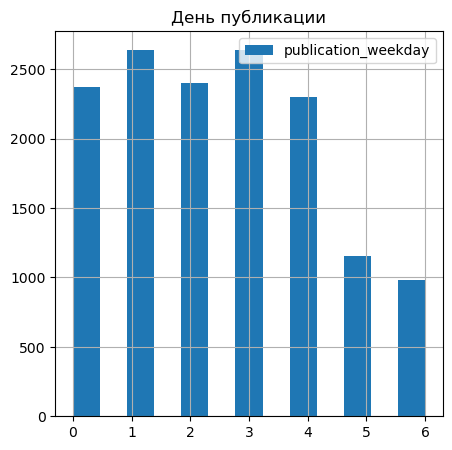

0-пн, 1-вт, 2-ср, 3-чт, 4-пт, 5-сб, 6-вс



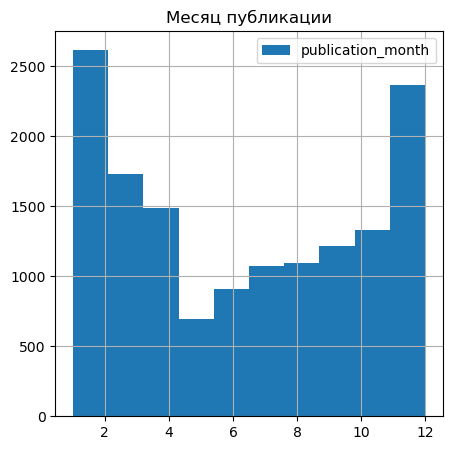

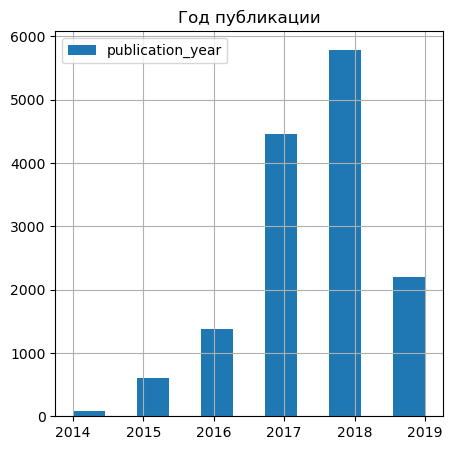

In [49]:
#День недели, месяц, год публикации:
data.hist('publication_weekday', figsize=(5, 5), bins=13, legend=True)
plt.title('День публикации')
plt.show()
print('0-пн, 1-вт, 2-ср, 3-чт, 4-пт, 5-сб, 6-вс')
print()
data.hist('publication_month', figsize=(5, 5), legend=True)
plt.title('Месяц публикации')
plt.show()
data.hist('publication_year', figsize=(5, 5), bins=11, legend=True)
plt.title('Год публикации')
plt.show()

#### День недели, месяц, год публикации:
<b>День недели:</b><ul>
<li> График показывает, что <b>вторник и четверг</b> - наиболее популярные дни публикации (примерно по 2700 объявлений в каждом случае, то есть по 11% от общего числа).<br>
<li> Реже всего выставляют квартиры в <b> воскресенье и субботу </b> (4% и  5% случаев).<br>
<li> <b>Понедельник, среда и пятница </b> примерно одинаковы, около 4300 объявлений. <br>
</ul>

<b>Месяц публикации:</b><ul>
<li> <b>Январь</b> лидирует с большим отрывом как месяц с наибольшим количество выложенных объявлений.<br>
<li> <b>Декабрь</b> на втором месте.<br>
<li> Есть явная и вполне предсказуемая просадка по объявлениям, начиная с <b>мая</b> (максимальная просадка) по <b> сентябрь</b> (т.е. конец весны и все лето).<br>
<li> Летом люди действительно занимаются другими делами - дача, отпуск, путешествия, и, возможно, откладывают вопрос до осени-зимы, ведь объявление о продаже влечет за собой необходимость показывать квартиру и быть на связи.<br>
</ul>

<b>Год публикации:</b><ul>
<li> Объявления в базе охватывают период с <b>2014 по 2019</b> год включительно.<br>
<li> <b>2018</b> - 25% всех публикаций, самый активный год.<br>
<li> <b>2017</b> - 18% всех объявлений, второй по активности год.<br>
<li> <b>2019</b> - на удивление существенное падение. В окне ниже отфильтруем таблицу по столбцу <i>first_day_exposition</i> по убыванию и увидим, что база включает объявления только за половину 2019-го года - до мая включительно. Этим и обусловлена такая разница, заметная на графике.<br>
<li> <b>2014</b> - минимальное количество объявлений (0,5%).</ul>

In [27]:
#pub_year = data.groupby('publication_year')['publication_year'].sort_values(ascending=False)
pub_year = data.sort_values(by = ['first_day_exposition'], ascending = [False])
print(pub_year['first_day_exposition'].head(10))

17872   2019-05-03
15072   2019-05-03
12208   2019-05-03
21887   2019-05-03
3254    2019-05-03
12380   2019-05-03
12343   2019-05-03
9217    2019-05-03
5986    2019-05-03
15881   2019-05-03
Name: first_day_exposition, dtype: datetime64[ns]


### <b>Изучим, как быстро продавались квартиры (столбец days_exposition). </b> <br>
Этот параметр показывает, сколько дней «висело» каждое объявление.
<br>
Построим гистограмму. Посчитаем среднее и медиану. <br>
В ячейке типа markdown опишу, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
  

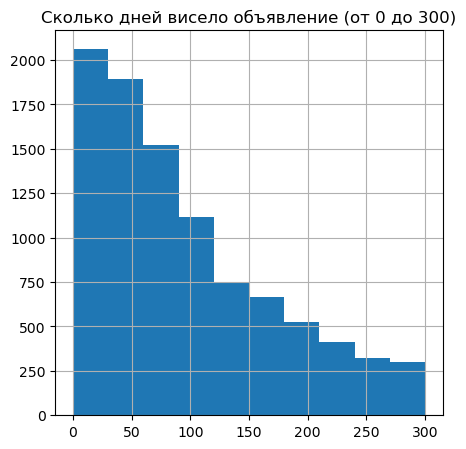

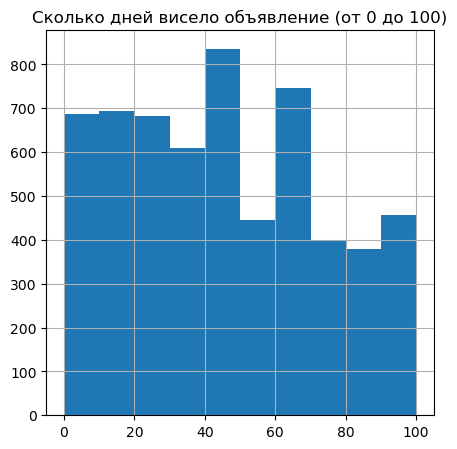

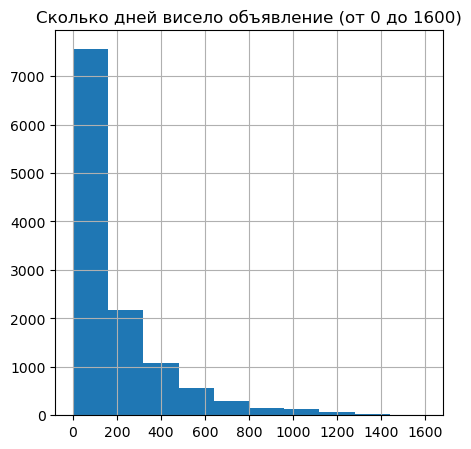

Среднее арифметическое: 190.42
Медиана 103.0


In [53]:
#Посмотрим, сколько обычно занимает продажа:
data.hist('days_exposition', range=(0,300), figsize=(5, 5))
plt.title('Сколько дней висело объявление (от 0 до 300)')
plt.show()

#Быстрые продажи:
data.hist('days_exposition', range=(0,100), figsize=(5, 5))
plt.title('Сколько дней висело объявление (от 0 до 100)')
plt.show()

#Необычно долгие продажи:
data.hist('days_exposition', range=(0,1600), figsize=(5, 5))
plt.title('Сколько дней висело объявление (от 0 до 1600)')
plt.show()

print('Среднее арифметическое:', data['days_exposition'].mean().round(2))
print('Медиана', data['days_exposition'].median())

 <b> Наблюдения: </b><br>

* 30% квартир продается в первые 30 дней.
* 18% продаж можно считать быстрыми - они происходят в первую неделю (примерно 7 дней).
* Необычно долгими на первый взгляд можно считать продажи свыше 500 дней (примерно 1,5 года), но лучше посчитать межквартильный размах.
* Так как медиана равна 72, то в среднем квартира продается за 72 дня.
* Стоит отметить, что среднее арифметическое более чем два раза превышает медиану, то есть в данных присутствуют выбросы. Они видны в качестве хвоста на последнем графике. Видимо, их либо слишком много, либо значения этих выбросов слишком велики.
  

       days_exposition
count     12043.000000
mean        190.423981
std         228.722279
min           1.000000
25%          45.000000
50%         103.000000
75%         248.000000
max        1580.000000

IQR (межквартильный размах) равен: 185
Левый ус равен: -260.5
Правый ус равен: 479.5


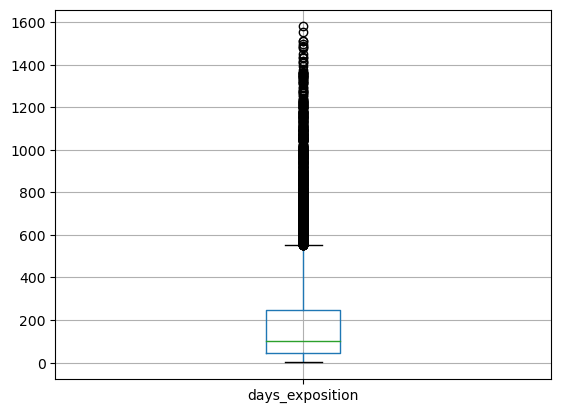

In [54]:
#Строим боксплот, межквартильный размах и усы:
all_days_exposition = data['days_exposition']
all_days_exposition = all_days_exposition.to_frame()

all_days_exposition.boxplot()
print(all_days_exposition.describe())
print()
Q1 = 17
Q3 = 202
IQR = Q3-Q1
Q1_mustach = (Q1 - IQR*1.5)
Q3_mustach = (Q3 + IQR*1.5)

print('IQR (межквартильный размах) равен:', IQR)
print('Левый ус равен:', Q1_mustach)
print('Правый ус равен:', Q3_mustach)

<b>Посчитав межквартильный размах и "усы"</b>, в которые попадают нормальные значения, а за пределами которых находятся выбросы, мы понимаем, как много выбросов у нас в промежутке от 480 до 1600 дней.

In [55]:
bad_data = data.query("480 <= days_exposition <= 1600")
print('Количество выбросов:', bad_data['days_exposition'].count())


Количество выбросов: 1240


Таких строк со значениями <i>days_exposition</i> от 480 до 1600 дней получается <b>1240</b>. Они и смещают наше среднее. 
<br> Таким образом, мы можем назвать долгими продажами все, что свыше 1,5 лет.

### <b>Какие факторы больше всего влияют на общую (полную) стоимость объекта? </b>
<br>
 Изучите, зависит ли цена от:
 <ul>
<li> общей площади;
<li> жилой площади;
<li> площади кухни;
<li> количества комнат;
<li> этажа, на котором расположена квартира (первый, последний, другой);
<li> даты размещения (день недели, месяц, год).
    </ul>
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

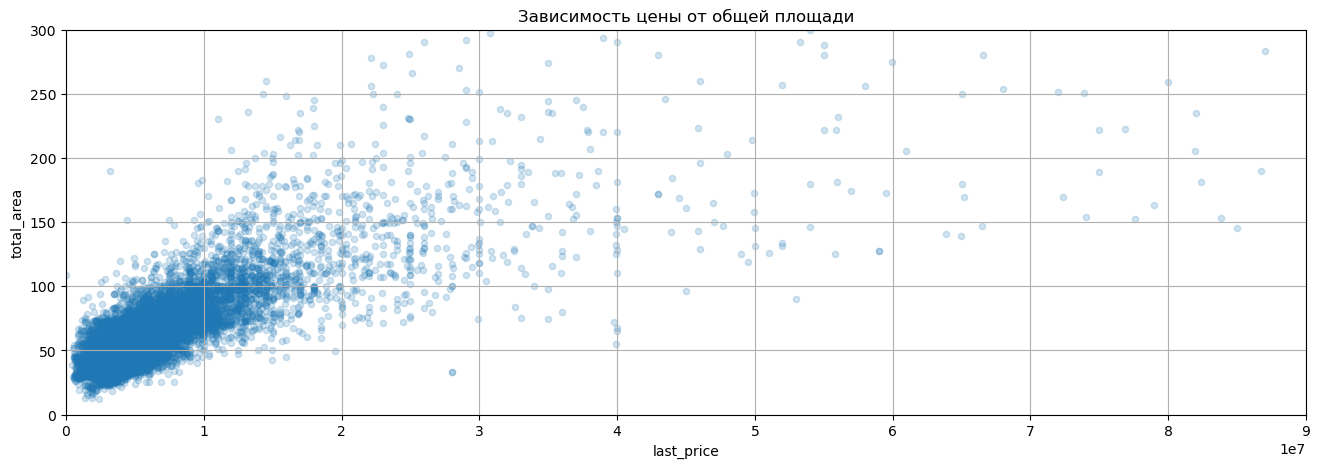

Коэффициент корреляции цены и общей площади: 0.71



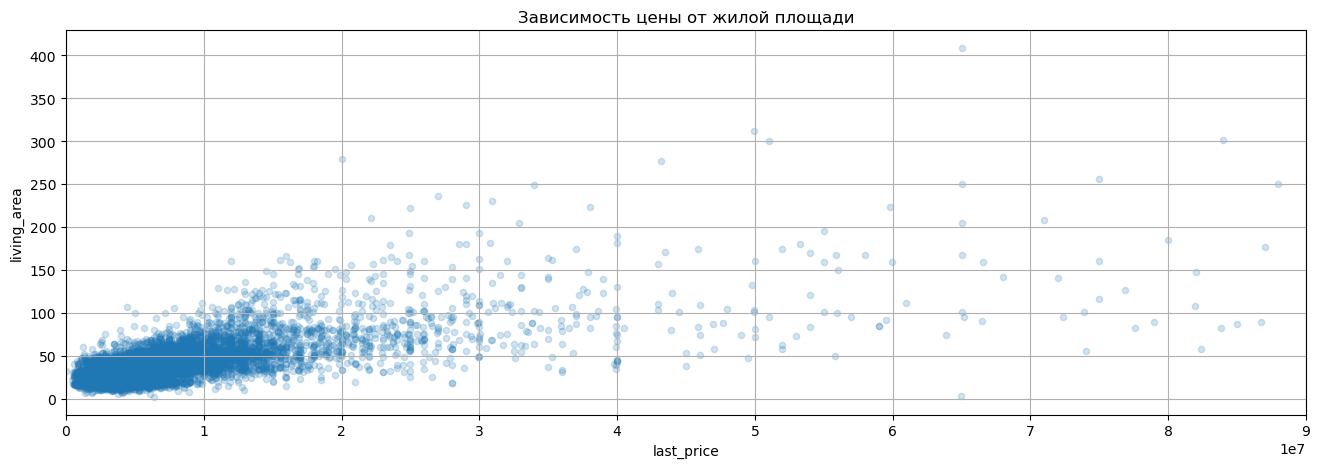

Коэффициент корреляции цены и жилой площади: 0.63



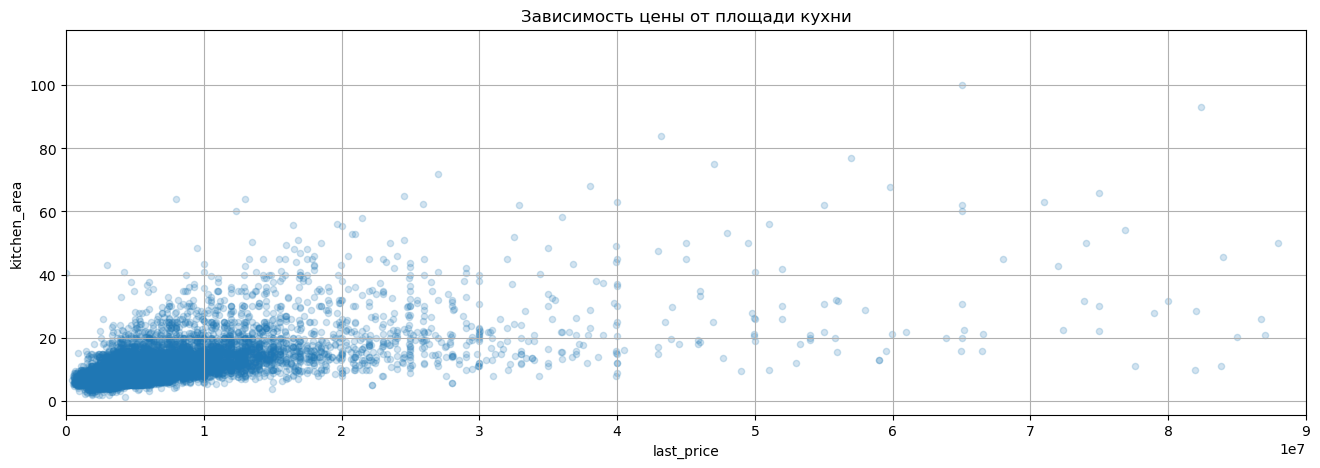

Коэффициент корреляции цены и площади кухни: 0.56



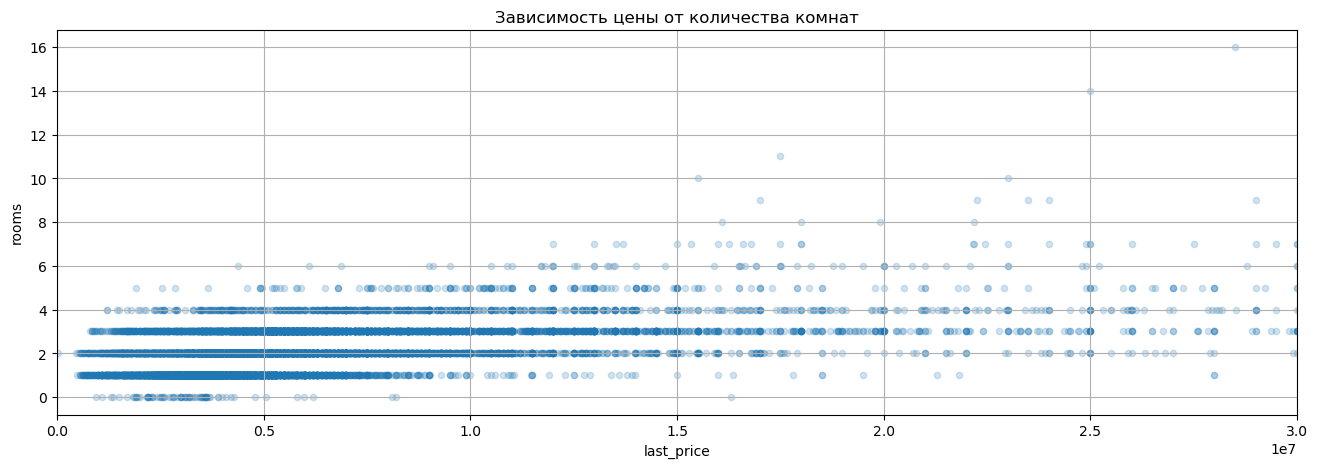

Коэффициент корреляции цены и количества комнат: 0.4



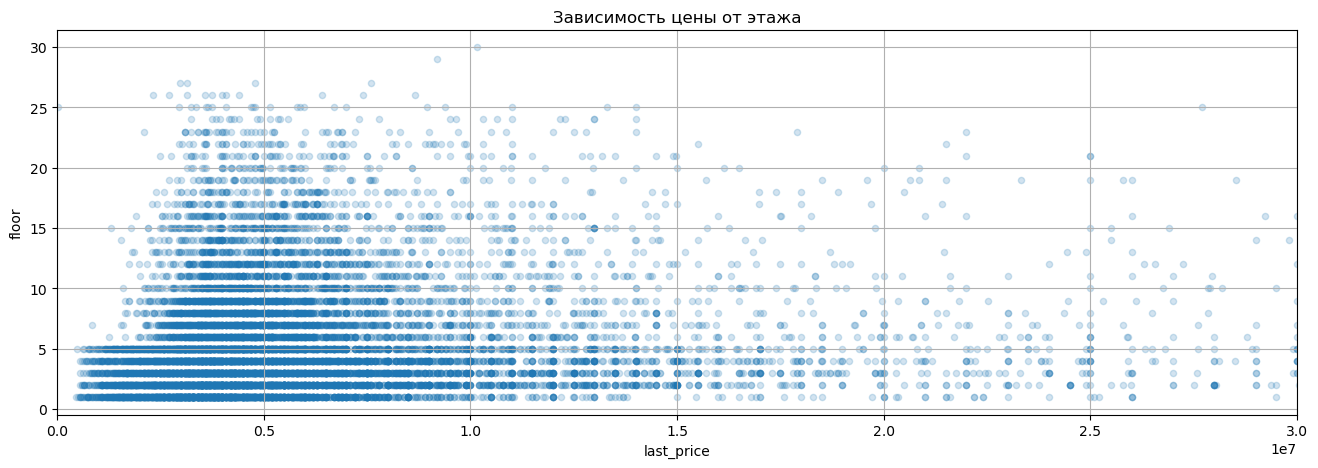

Коэффициент корреляции цены и этажа: 0.04



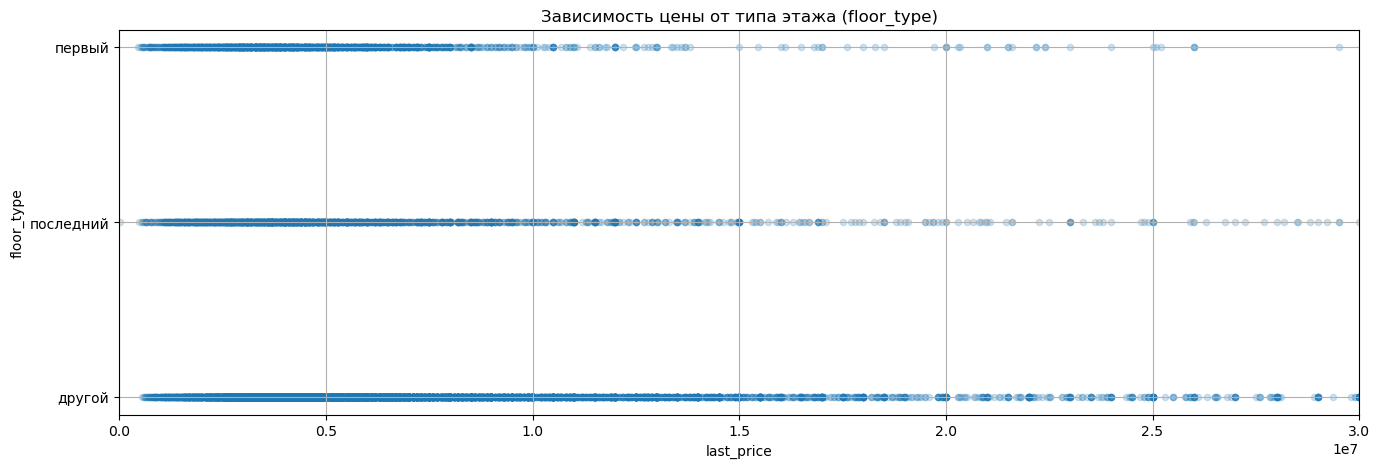

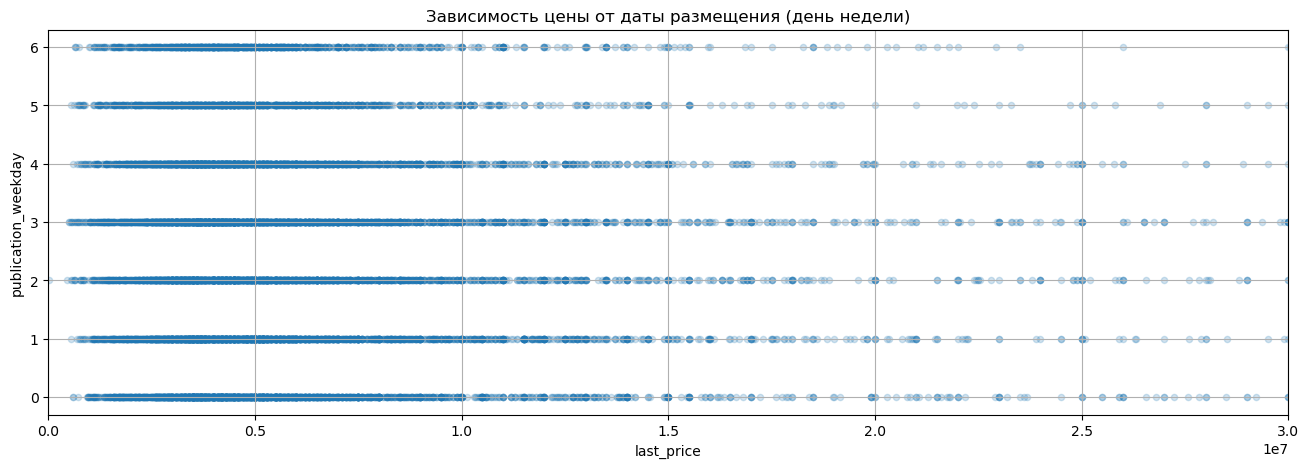

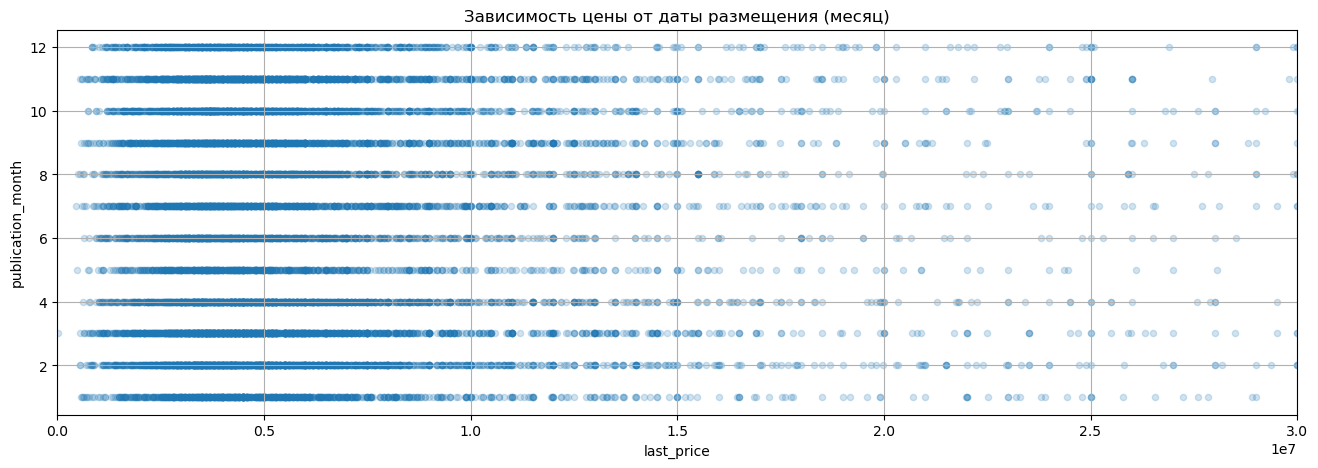

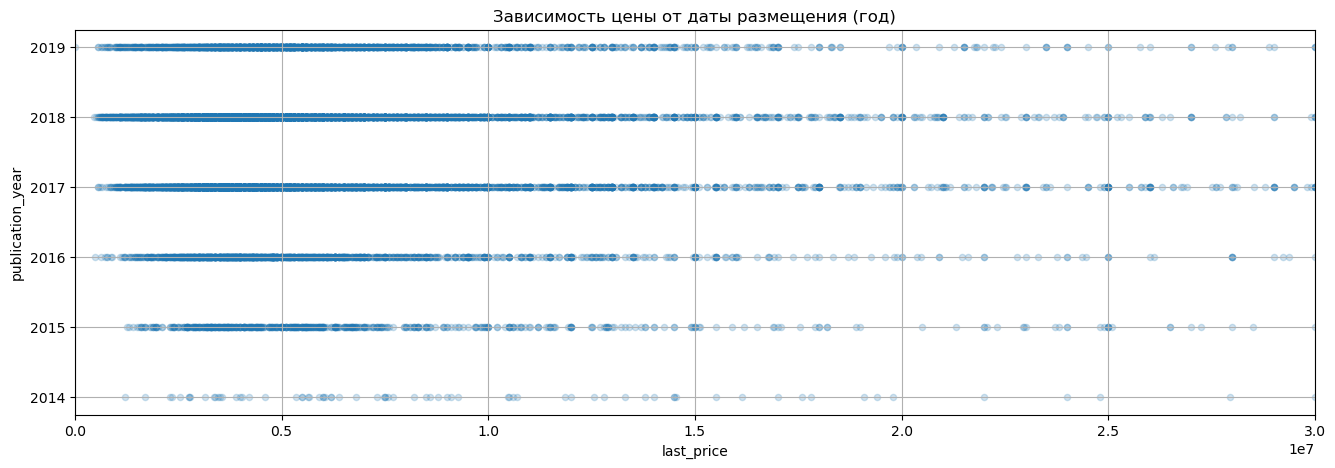

In [31]:
#Зависимость цены от общей площади:
data.plot(title='Зависимость цены от общей площади', y='total_area', x='last_price', xlim=(0,90000000), ylim=(0,300), kind='scatter', grid=True, figsize=(16, 5), alpha=0.2)
plt.show()
print('Коэффициент корреляции цены и общей площади:', data['total_area'].corr(data['last_price']).round(2))
print()

#Зависимость цены от жилой площади:
data.plot(title='Зависимость цены от жилой площади', y='living_area', x='last_price', xlim=(0,90000000), kind='scatter', grid=True, figsize=(16, 5), alpha=0.2)
plt.show()
print('Коэффициент корреляции цены и жилой площади:', data['living_area'].corr(data['last_price']).round(2))
print()

#Зависимость цены от площади кухни:
data.plot(title='Зависимость цены от площади кухни', y='kitchen_area', x='last_price', xlim=(0,90000000), kind='scatter', grid=True, figsize=(16, 5), alpha=0.2)
plt.show()
print('Коэффициент корреляции цены и площади кухни:', data['kitchen_area'].corr(data['last_price']).round(2))
print()

#Зависимость цены от количества комнат:
data.plot(title='Зависимость цены от количества комнат', y='rooms', x='last_price', xlim=(0,30000000), kind='scatter', grid=True, figsize=(16, 5), alpha=0.2)
plt.show()
print('Коэффициент корреляции цены и количества комнат:', data['rooms'].corr(data['last_price']).round(2))
print()

#Зависимость цены от этажа:
data.plot(title='Зависимость цены от этажа', y='floor', x='last_price', xlim=(0,30000000), kind='scatter', grid=True, figsize=(16, 5), alpha=0.2)
plt.show()
print('Коэффициент корреляции цены и этажа:', data['floor'].corr(data['last_price']).round(2))
print()

#Зависимость цены от типа этажа (floor_type):
data.plot(title='Зависимость цены от типа этажа (floor_type)', y='floor_type', x='last_price', xlim=(0,30000000), kind='scatter', grid=True, figsize=(16, 5), alpha=0.2)
plt.show()
print()

#Зависимость цены от даты размещения (день недели):
data.plot(title='Зависимость цены от даты размещения (день недели)', y='publication_weekday', x='last_price', xlim=(0,30000000), kind='scatter', grid=True, figsize=(16, 5), alpha=0.2)
plt.show()
print()

#Зависимость цены от даты размещения (месяц):
data.plot(title='Зависимость цены от даты размещения (месяц)', y='publication_month', x='last_price', xlim=(0,30000000), kind='scatter', grid=True, figsize=(16, 5), alpha=0.2)
plt.show()
print()

#Зависимость цены от даты размещения (год):
data.plot(title='Зависимость цены от даты размещения (год)', y='publication_year', x='last_price', xlim=(0,30000000), kind='scatter', grid=True, figsize=(16, 5), alpha=0.2)
plt.show()
print()

<b>Наблюдения зависимости цены</b> <br>
  Мы можем проанализировать зависимость цены от:
<ul>
<li> общей площади - положительная корреляция (чем больше общая площадь, тем выше цена). Коэффициент корреляции составил 0.71, что говорит о достаточно сильной связи.
<li> жилой площади - положительная корреляция, коэффициент составил 0.63, что чуть меньше, чем с общей площадью, но все же говорит о наличии взаимосвязи.
<li> площади кухни - положительная корреляция, коэффициент составил 0.56, что говорит о наличии связи, однако не слишком сильной.
<li> количества комнат - положительная корреляция, коэффициент составил 0.4 - связь есть, но слабая.
<li> этажа - трудно говорить о корреляции, коэффициент составил 0.04 - взаимосвязь отсутствует.
    </ul>

### <b>Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.</b>
<br> Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [32]:
top_places = data['locality_name'].value_counts().head(10).index
local_square_m_price = data.query('locality_name in @top_places').pivot_table(values='square_m_price', index ='locality_name', aggfunc='median').round(2)
display(local_square_m_price.sort_values('square_m_price', ascending=False))


,square_m_price
locality_name,
Санкт-Петербург,105714.0
Пушкин,100000.0
Кудрово,96540.0
Парголово,91040.0
Мурино,86432.0
Петергоф,82142.0
Шушары,77735.0
Колпино,74725.0
Гатчина,68604.0


<b>Самая высокая стоимость кв. метра</b> - 115 тыс. 664 руб - в Санкт-Петербурге. <br>
<b>Самая низкая </b> - 67 тыс. 344 руб. - во Всеволожске.

### <b>Выделить квартиры в Санкт-Петербурге и найти среднюю цену каждого километра (до центра)</b>
<br>
Описать, как стоимость объектов зависит от расстояния до центра города.
<br>
Поcтроим график медианной цены в зависимости от удаленности от центра города:


Всего квартир в Санкт-Петербурге: 10112



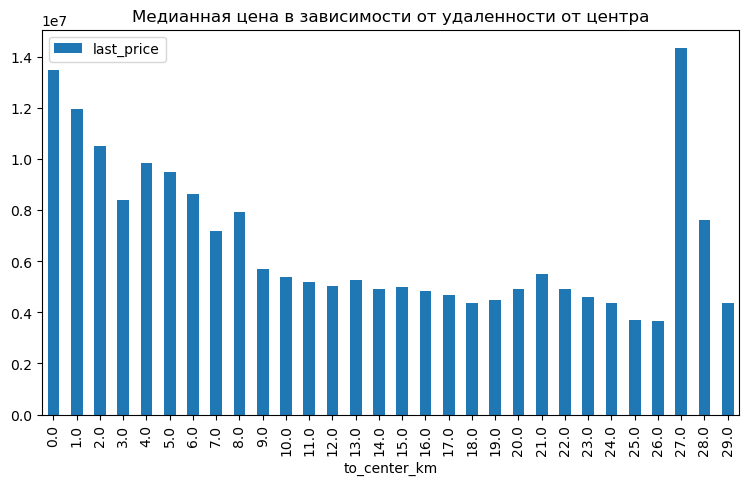

In [56]:
locality_data = data.query("locality_name == 'Санкт-Петербург'")
print('Всего квартир в Санкт-Петербурге:', locality_data['locality_name'].count())
print()

locality_data_grouped = locality_data.groupby('to_center_km')['last_price'].median().reset_index().sort_values(by='to_center_km', ascending=True)    
locality_data_grouped.plot(title='Медианная цена в зависимости от удаленности от центра', x='to_center_km', y='last_price', kind='bar', figsize=(9,5), legend=True)
plt.show()


### <b>Наблюдения:</b>
Цена стабильно снижается по мере удаленности от центра, что подтверждает теорию зависимости цены на квартиру от ее близости к центру. <br> Но есть любопытный выброс в районе 27-28 км. Возможно, здесь продается несколько особенно дорогих квартир, которые так влияют на график. <br>Или же цена на квартиру указана с ошибкой, так как 27-28 км от центра Петербурга - это уже пригород.

## Общий вывод

Перед нами стояла задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.    
    <br>
Резюмируя все вышеизложенное, выделю свои главные "находки" на рынке недвижимости Петербурга и пригородов периода 2014-2019 годов: <br>   
<ol>
<li> Судя по пропускам, на рынке почти не представлены апартаменты. И это правда, так как в те времена их было крайне мало, большинство апартаментов находились в процессе строительства.   
<li> Пропущенные данные о близости парков и водоемов, однако, свидетельствуют не об их отсутствии, а о несущественном их влиянии в те годы близости зеленых зон на решение о покупке. Продавцы и агенты не заполняли эту информацию, возможно, не видя взаимосвязи с успешной реализацией квартиры.   
<li> Высоту потолков также довольно часто не указывали. Учитывая, что медианное значение равно 2,65, пропуски неудивительны. В Петербурге квартирами с высокими потолками считаются те, у которых высота 3 и более метра. А если есть опция указывать низкий потолок или не указывать его вовсе, агенты и продавцы могли предпочитать второй вариант.
<li> <b>Площадь: общая, жилая, кухня:</b><ul>
        <li> Большинство (60%) выставленных на продажу квартир - общей площадью от 40 до 60 кв. метров.
        <li> Четверть (25%) - квартиры общей площадью от 60 до 90 кв. метров.
        <li> А вот квартир площадью около 100 кв метров, менее 1%.
        <li> Площадь жилых помещений чаще всего в районе 20-30 кв. метров, чуть реже - около 40 кв. метров.
        <li> Площадь кухни при этом примерно в 50% случаев - до 10 кв. метров, в 30% - от 10 до 15 кв. метров. 
        <li> Распределение на графиках общей, жилой площади и площади кухни в целом схоже. 
        <li> Можно сказать, что при общей площади около 50 кв. метров примерно 20-30 кв. будет занимать жилая часть и 5-10 - кухня.
    </ul>
    <br>
<li> <b>Стоимость квартир:</b><ul>
        <li> Стоимость квартир в подавляющем большинстве до 15 млн рублей, причем чаще всего (55% объявлений) продают квартиры в ценовом диапазоне от 3 до 6 млн рублей (по ценам 2014-2019 гг.).  
        <li> Часть низкобюджетных предложений (до 3 млн руб) составляет примерно 16% от всех объявлений. 
        <li> Такую же долю занимают и предложения чуть выше рынка, от 6 до 9 млн рублей. 
        <li> Квартиры от 9 и более млн рублей встречаются значительно реже (в сумме на них приходится 13% всех объявлений)
    </ul>
    <br>
<li> <b>Количество комнат:</b> <ul>
        <li> Одно- и двухкомнатных квартир продается примерно одинаковое количество - около 8000 объявлений , что составляет более трети (33.7%) всех объявлений в каждом случае. 
        <li> Примерно четверть квартир, выставленных на продажу, являются трехкомнатными.
        <li> Примерно 7,5% приходится на 4,5 и 6-комнатные квартиры.
    </ul>
    <br>
<li> <b>Высота потолков:</b> <ul>
        <li> Высота потолков в 66% объявлений - от 2,6 до 2,8 метра, что является стандартной высотой. 
        <li> При этом существенную долю (21%) занимают квартиры с низкими потолками (до 2,5 метров). 
        <li> Квартир с высокими потолками гораздо меньше - 2,9 - 3,2 метра, к примеру, менее чем у 1% квартир.
    </ul>
    <br>
<li> <b>Этажность:</b> <ul>
        <li> Первых и последних этажей менее 1% всех объявлений в каждом случае. Остальные 98% приходятся на «другие» этажи. 
        <li> В основном продаются квартиры до 3-го этажа (37% всех объявлений). 
        <li> На 4-5 этажи приходится 24% всех объявлений. 
        <li> На 6-8 этажи - 16% всех объявлений.
        <li> На 9-10 - 7%.
        <li> Остальные 16% на квартиры от 11 этажа и выше.
        <li> В целом распределение достаточно равномерное, ступенчатое, за исключением явно выделяющейся на графике «ступеньки» первых трех этажей.
        <li> Среди общего количества этажей в домах демонстрируют преимущество квартиры в 4-7 этажных домах (33%). 
        <li> В домах от 7 до 10 этажей находится 20% всех квартир в выборке. 
        <li> Низкие дома (от 1 до 4 этажей) составляют всего 4%. 
        <li> Все остальные квартиры (43%) более-менее равномерно распределены по домам с этажностью от 10.
    </ul>
    <br>
<li><b>Расстояние до центра</b> <ul>
        <li> Совсем близко к центру (до 5 км) расположено 7% квартир.
        <li> Близко к центру (от 5 до 10 км) - расположено 9% квартир.
        <li> 36% квартир расположены в 10-13 км от центра. Это преобладающее расстояние.
        <li> 24% квартиры - 13-16 км от центра.
        <li> 7% квартир - от 16 до 20 км от центра.
        <li> Все остальные квартиры (17%) расположены дальше 20 км от центра.    
    </ul>
    <br>
<li> <b>Расстояние до аэропорта:</b><ul>
        <li> Ближе 5 км к аэропорту никто из нашей выборки не живет.
        <li> Четверть всех квартир (25%) находится в 5-10 км от аэропорта.
        <li> Многие квартиры продаются в 10-26 км от аэропорта.
        <li> В целом распределение достаточно равномерное, ступенчатое, за исключением явно выделяющейся на графике «ступеньки» 5-10 км.
    </ul>
    <br>
<li> <b>Расстояние до парков:</b><ul>
        <li> Парки по расстоянию доступнее, чем центр и аэропорт.
        <li> Обрывочный график напоминает о том, что данных довольно мало. Далеко не все указали доступность парка рядом с собой.
        <li> Поэтому, имея данные квартир, где расстояние до парка все же указали, можем сделать лишь ограниченные выводы.
        <li> Большинство таких квартир (66%) расположено примерно в 5 км от парка.<br>
        <li> Еще четверть квартир (25%) расположена близко к парку - до 1 км. 
</ul><br>
<li> <b> Скорость продаж квартир: </b><ul>
        <li> 30% квартир продается в первые 30 дней.
        <li> 18% продаж можно считать быстрыми - они происходят в первую неделю (примерно 7 дней).
        <li> Необычно долгими можно считать продажи свыше 480 дней (примерно 1,5 года).
        <li> Так как медиана равна 72, то в среднем квартира продается за 72 дня.
        <li> Стоит отметить, что среднее арифметическое более чем два раза превышает медиану, то есть в данных присутствуют выбросы. Они видны в качестве хвоста на последнем графике. Видимо, их либо слишком много, либо значения этих выбросов слишком велики.    
    </ul> <br>
<li> <b>Зависимость цены квартир от других параметров:</b><ul>
        <li> общей площади - положительная корреляция (чем больше общая площадь, тем выше цена). Коэффициент корреляции составил 0.71, что говорит о достаточно сильной связи.
        <li> жилой площади - положительная корреляция, коэффициент составил 0.63, что чуть меньше, чем с общей площадью, но все же говорит о наличии взаимосвязи.
        <li> площади кухни - положительная корреляция, коэффициент составил 0.56, что говорит о наличии связи, однако не слишком сильной.
        <li> количества комнат - положительная корреляция, коэффициент составил 0.4 - связь есть, но слабая.
        <li> этажа - трудно говорить о корреляции, коэффициент составил 0.04 - взаимосвязь отсутствует.
        <li> <b>Самая высокая стоимость кв. метра</b> - 115 тыс. 664 руб - в Санкт-Петербурге. <br>
        <li> <b>Самая низкая </b> - 67 тыс. 344 руб. - во Всеволожске.    
        <li> Цена стабильно снижается по мере удаленности от центра, что подтверждает теорию зависимости цены на квартиру от ее близости к центру.
    </ul>  <br>
    
<li><b>Год, месяц и день публикации:</b><ul>
<b>День недели:</b><br>
        <li> График показывает, что <b>вторник и четверг</b> - наиболее популярные дни публикации (примерно по 2700 объявлений в каждом случае, то есть по 11% от общего числа).<br>
        <li> Реже всего выставляют квартиры в <b> воскресенье и субботу </b> (4% и  5% случаев).<br>
        <li> <b>Понедельник, среда и пятница </b> примерно одинаковы, около 4300 объявлений. <br>
    </ul>
<br><b>Месяц публикации:</b><br><ul>
        <li> <b>Январь</b> лидирует с большим отрывом как месяц с наибольшим количество выложенных объявлений.<br>
        <li> <b>Декабрь</b> на втором месте.<br>
        <li> Есть явная и вполне предсказуемая просадка по объявлениям, начиная с <b>мая</b> (максимальная просадка) по <b> сентябрь</b> (т.е. конец весны и все лето).<br>
        <li> Летом люди действительно занимаются другими делами - дача, отпуск, путешествия, и, возможно, откладывают вопрос до осени-зимы, ведь объявление о продаже влечет за собой необходимость показывать квартиру и быть на связи.<br>
    </ul>
<br><b>Год публикации:</b><ul>
        <li> Объявления в базе охватывают период с <b>2014 по 2019</b> год включительно.<br>
        <li> <b>2018</b> - 25% всех публикаций, самый активный год.<br>
        <li> <b>2017</b> - 18% всех объявлений, второй по активности год.<br>
    <li> <b>2019</b> - на удивление существенное падение. Мы отфильтровали таблицу по столбцу <i>first_day_exposition</i> по убыванию и увидели, что база включает объявления только за половину 2019-го года - до мая включительно. Этим и обусловлена такая разница.<br>
    <li> <b>2014</b> - минимальное количество объявлений (0,5%).<br> 
    </ul>
</ol>    

